In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

2023-06-02 19:32:15.679592: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 19:32:15.712804: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 19:32:15.713694: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 19:32:16.414535: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Read the data
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)

In [4]:
# preprocess the data
data = data.sort_values('Date')                             # Sort the data on date
data = data.dropna()                                        # drop null values
data = data.drop_duplicates(subset=['Date'], keep='first')  # drop duplicate values

# Convert date to numerical representation
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].apply(lambda x: datetime.toordinal(x))

In [5]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,733974,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,733975,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,733976,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,733979,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,733980,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
# regularize the data
scaler = MinMaxScaler(feature_range=(0, 1))
transformed_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

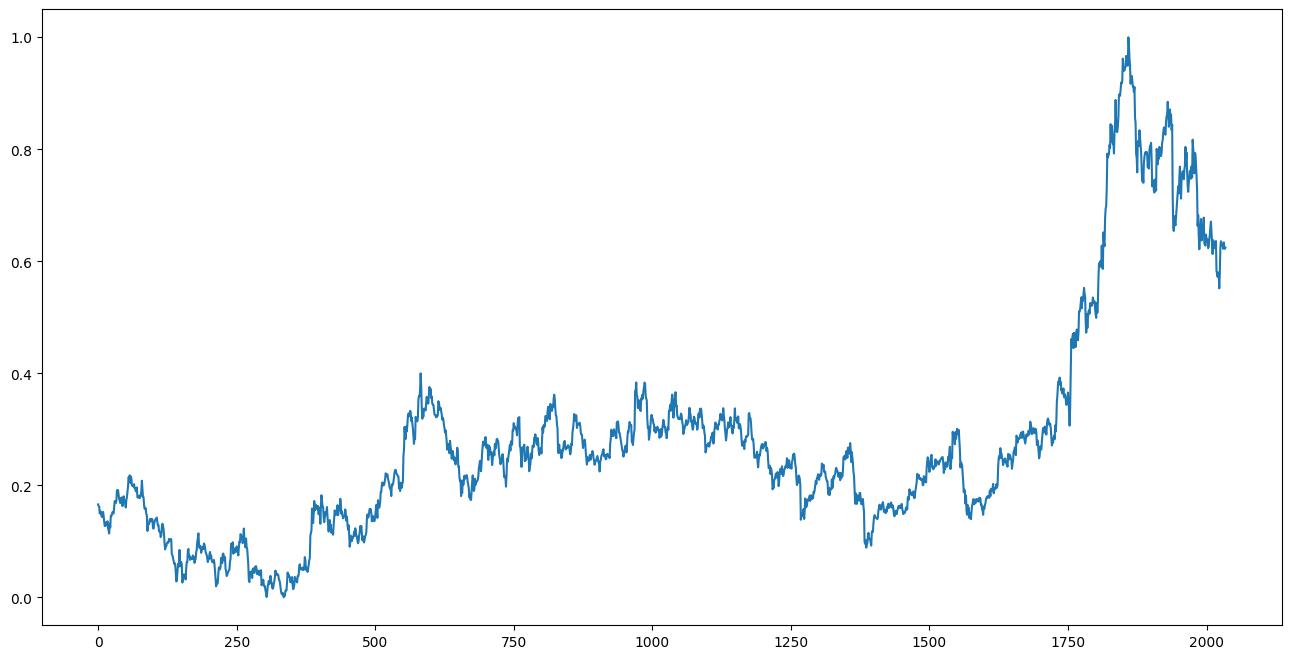

In [7]:
# plot the data
plt.figure(figsize=(16, 8)) 
plt.plot(transformed_data)
plt.show()

In [8]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(transformed_data, transformed_data, test_size=0.4, random_state=0, shuffle=False)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0, shuffle=False)

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(1221, 1) (1221, 1)
(407, 1) (407, 1)
(407, 1) (407, 1)


In [9]:
# reshape the data
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_cv = X_cv.reshape((X_cv.shape[0], 1, X_cv.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)


(1221, 1, 1) (1221, 1)
(407, 1, 1) (407, 1)
(407, 1, 1) (407, 1)


In [11]:
# build the model
# We use dropout to prevent overfitting as it is a common problem with RNNs. It drops some of the neurons randomly to prevent them from learning the noise in the data.
# The Dense layer is generally used as the output layer in LSTMs. It is used to produce the output of the neural network by combining the features obtained/learned from the all previous layers
model = Sequential(
    [LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    Dense(1)]
)

2023-06-02 19:33:48.820722: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-02 19:33:48.822597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-02 19:33:48.823488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [13]:
# compile the model
# We use adam optimizer 
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_cv, y_cv), verbose=2, shuffle=False)
# model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/50


2023-06-02 19:37:14.832189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-02 19:37:14.833536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-02 19:37:14.834371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

17/17 - 2s - loss: 0.0365 - val_loss: 0.0181 - 2s/epoch - 130ms/step
Epoch 2/50
17/17 - 0s - loss: 0.0183 - val_loss: 0.0064 - 53ms/epoch - 3ms/step
Epoch 3/50


2023-06-02 19:37:16.729647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-02 19:37:16.731441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-02 19:37:16.732497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

17/17 - 0s - loss: 0.0094 - val_loss: 0.0019 - 47ms/epoch - 3ms/step
Epoch 4/50
17/17 - 0s - loss: 0.0067 - val_loss: 0.0011 - 49ms/epoch - 3ms/step
Epoch 5/50
17/17 - 0s - loss: 0.0066 - val_loss: 0.0012 - 41ms/epoch - 2ms/step
Epoch 6/50
17/17 - 0s - loss: 0.0065 - val_loss: 0.0012 - 39ms/epoch - 2ms/step
Epoch 7/50
17/17 - 0s - loss: 0.0063 - val_loss: 0.0011 - 44ms/epoch - 3ms/step
Epoch 8/50
17/17 - 0s - loss: 0.0060 - val_loss: 0.0011 - 45ms/epoch - 3ms/step
Epoch 9/50
17/17 - 0s - loss: 0.0058 - val_loss: 9.9882e-04 - 46ms/epoch - 3ms/step
Epoch 10/50
17/17 - 0s - loss: 0.0056 - val_loss: 9.5383e-04 - 44ms/epoch - 3ms/step
Epoch 11/50
17/17 - 0s - loss: 0.0052 - val_loss: 9.0854e-04 - 45ms/epoch - 3ms/step
Epoch 12/50
17/17 - 0s - loss: 0.0050 - val_loss: 8.6118e-04 - 46ms/epoch - 3ms/step
Epoch 13/50
17/17 - 0s - loss: 0.0048 - val_loss: 8.1028e-04 - 46ms/epoch - 3ms/step
Epoch 14/50
17/17 - 0s - loss: 0.0045 - val_loss: 7.7437e-04 - 47ms/epoch - 3ms/step
Epoch 15/50
17/17 - 0s